<a href="https://colab.research.google.com/github/pravat-986/FoodModel/blob/main/Vgg16_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required libraries
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
import os
print("All Imported")

All Imported


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive

/content/drive


In [ ]:
ls

MyDrive/


In [ ]:
cd My Drive/Model

/content/drive/My Drive/Model


In [ ]:
ls

 food_detection_model.h5   test/  'train image'/   validation/


In [ ]:
# create a VGG16 model instance without top layers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# create a new model
model = Sequential()

In [ ]:
# add the VGG16 model to the new model
model.add(vgg_model)

In [ ]:
# add new layers on top of the VGG16 model
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# create a data generator for training data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# create a data generator for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# set the batch size and image size
batch_size = 32
img_size = (224, 224)

In [ ]:
# create the training data generator
train_generator = train_datagen.flow_from_directory('train image', target_size=img_size, batch_size=batch_size, class_mode='categorical')

Found 1093 images belonging to 7 classes.


In [ ]:
# create the validation data generator
val_generator = val_datagen.flow_from_directory('validation', target_size=img_size, batch_size=batch_size, class_mode='categorical')

Found 208 images belonging to 7 classes.


In [ ]:
# train the model
history=model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
35/35 [==============================] - 246s 6s/step - loss: 2.4695 - accuracy: 0.3211 - val_loss: 2.2033 - val_accuracy: 0.1442
Epoch 2/10
35/35 [==============================] - 25s 709ms/step - loss: 1.7139 - accuracy: 0.3934 - val_loss: 2.1550 - val_accuracy: 0.1442
Epoch 3/10
35/35 [==============================] - 24s 679ms/step - loss: 1.6918 - accuracy: 0.3934 - val_loss: 2.2097 - val_accuracy: 0.1442
Epoch 4/10
35/35 [==============================] - 24s 688ms/step - loss: 1.7055 - accuracy: 0.3852 - val_loss: 2.1877 - val_accuracy: 0.1490
Epoch 5/10
35/35 [==============================] - 25s 703ms/step - loss: 1.5539 - accuracy: 0.4428 - val_loss: 1.7943 - val_accuracy: 0.2885
Epoch 6/10
35/35 [==============================] - 25s 721ms/step - loss: 1.4641 - accuracy: 0.4721 - val_loss: 1.9524 - val_accuracy: 0.2212
Epoch 7/10
35/35 [==============================] - 24s 682ms/step - loss: 1.3686 - accuracy: 0.4959 - val_loss: 2.0819 - val_accuracy: 0.2500
E

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

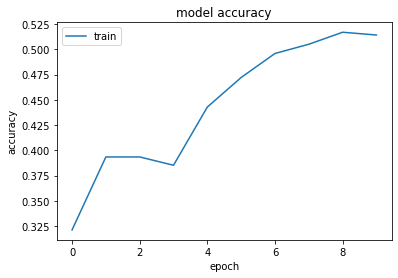

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

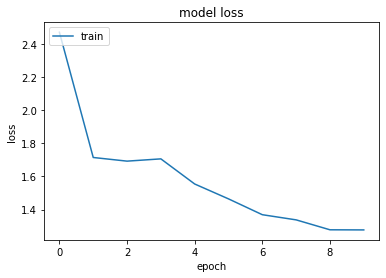

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

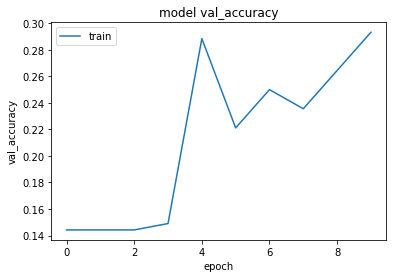

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.title('model val_accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

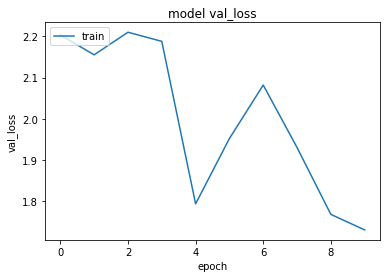

In [ ]:
plt.plot(history.history['val_loss'])
plt.title('model val_loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
# evaluate the model on the test set
loss, accuracy = model.evaluate(train_generator)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

35/35 [==============================] - 20s 551ms/step - loss: 1.2643 - accuracy: 0.4968
Test loss: 1.2642848491668701
Test accuracy: 0.4967978000640869
